 <span style="color:orange;font-size:20pt;font-weight:bold">CS412 - Machine Learning - Homework 1 - Berke Ayyıldızlı - 31018</span>

<span style="color:red;font-weight:bold">Required Libraries</span>

In [1]:
import numpy as np #for the calculations
import pandas as pd 
import matplotlib.pyplot as plt #for the graphs
from keras.datasets import fashion_mnist #for our training dataset
from sklearn.model_selection import train_test_split #for the split function to train the model

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score #for the scores of accuracies according to different ks.
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier #for our knn

from sklearn.metrics import confusion_matrix #for the numerical confusion matrix
import seaborn as sns #for the better plots
from sklearn.metrics import ConfusionMatrixDisplay #for the graphical confusion matrix


<span style="font-size:14pt;">Q1. Is your nearest neighbor close to you in high-dimensional space?</span>

In question, we will explore the behavior of distance metrics in high-dimensional spaces, something that
we discussed in class. You will plot closest to average ratio for data points when the number of dimensions
is varied and you will explore the pairwise distances for data points with low and higher dimensions. Follow
these steps:

<span style="color:red;">Step 1:</span> Data Generation: Write a function random points(num points, num dimensions) to generate numbers from a standard Normal distribution, num points random points in a num dimensional space.

In [2]:
def random_points(num_points,num_dimensions): #created a function to create numbers wanted from the given dimension.
    return np.random.randn(num_points,num_dimensions)

<span style="color:red">Step 2:</span> Average Distance of A Selected Point: Write a function average distance sp(points,
selected point) to calculate the average distance of the selected point to all other points in
points.

In [3]:
def average_distance_sp(points,selected_point): #created a function to find the average distance of one point to others
    distances = np.linalg.norm(points - points[selected_point], axis=1) #this linear algebra function finds the distance of the selected point to others
    distances = np.delete(distances, selected_point) # deletes the distance of the selected point to itself
    return np.mean(distances)

<span style="color:red">Step 3:</span> Minimum Distance of a Selected Point: Write a function minimum distance sp(points,
selected point) to calculate the minimum distance of the selected point and to all the other
points in points.

In [4]:
def minimum_distance_sp(points,selected_point): #created a function to find the minimum distance this time
    distances = np.linalg.norm(points - points[selected_point], axis=1) #again doing the same thing to subtract
    distances = np.delete(distances, selected_point) # deletes the distance of the selected point to itself
    return np.min(distances)

<span style="color:red">Step 4:</span> Closest-to-Average Ratio: Write a function closest to average ratio(min dist, avg dist)
to calculate the ratio of the closest distance to the average distance.

In [5]:
def closest_to_average_ratio(min_dist,avg_dist): #created this function to find the ratio between minimum distance and average distance
    return min_dist / avg_dist

<span style="color:red">Step 5:</span> Experimentation and Visualization:

a) Perform the following steps. For a given dimension d:

i. Generate 1000 d-dimensional data points, let’s call this set Sd

ii. Select a random point from Sd and calculate the average distance, minimum distance, and
closest-to-average ratio. Perform this for 100 different randomly selected points. Call this set
Ad

iii. Aggregate the results and compute the mean and standard deviation across the Ad.
Repeat (i)-(iii) for all dimensions d = 1, 2 . . . 100

In [6]:
#First of all i needed 6 arrays to hold each dimension's average distance, minimum distance and ratio data
mean_average_distance = [] #for the mean value of the average distances
standart_deviation_of_average_distance = [] #for the standart deviation of the average distances
   
mean_minimum_distance = [] #for the mean value of the minimum distances
standart_deviation_of_minimum_distance = [] #for the standart deviation of the minimum distances

mean_ratio = [] #for the mean value of closest to average ratio
standart_deviation_of_ratio = [] #for the standart deviation of the closest to average ratip

In [7]:
for d in range (1,101): #since we want all 100 dimensions
    
    average_distances = [] #for the average distances of the dimension
    minimum_distances = [] #for the minimum distance of the dimension
    closest_to_average_ratios = [] #for the mininum / average distance ratio
    
    Sd = random_points(1000,d) #creating the data points
    
    for _ in range(100):  #doing the same process for all 100 dimensions
        
        index_of_the_point = np.random.randint(0, 1000)  # selecting a point in all 1000 points
        
        average_distance = average_distance_sp(Sd, index_of_the_point) #calculating the average distance using our previously created function
        
        minimum_distance = minimum_distance_sp(Sd, index_of_the_point) #calculating the minimum distance using our function
        
        ratio_of_closest_to_average = closest_to_average_ratio(minimum_distance, average_distance) #calculating the ratio using our function
        
        average_distances.append(average_distance) #storing the average distance result
        
        minimum_distances.append(minimum_distance) #storing the minimum distance result
        
        closest_to_average_ratios.append(ratio_of_closest_to_average) #storing the ratio result
        
    mean_average_distance.append(np.mean(average_distances)) #appending all the values to the respected arrays for later use
    standart_deviation_of_average_distance.append(np.std(average_distances))
    mean_minimum_distance.append(np.mean(minimum_distances))
    standart_deviation_of_minimum_distance.append(np.std(minimum_distances))
    mean_ratio.append(np.mean(closest_to_average_ratios))
    standart_deviation_of_ratio.append(np.std(closest_to_average_ratios))

b) The mean average distance, the mean minimum distance, and the mean the closest-to-average ratio
as line plots against the number of dimensions. Show the standard deviation of the distributions
as well. The x-axis is varying d from 1 to 100. The y-axis is the metric value calculated.

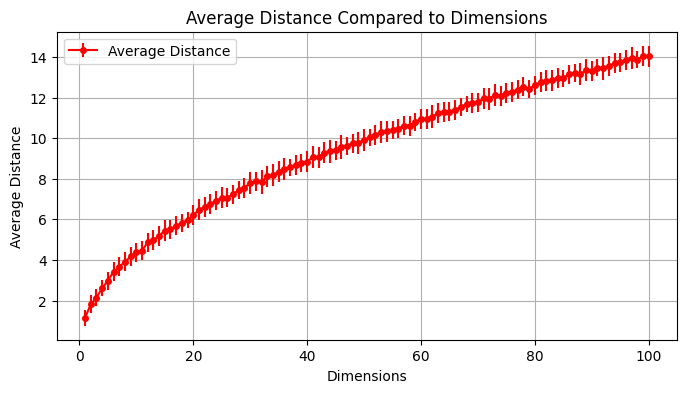

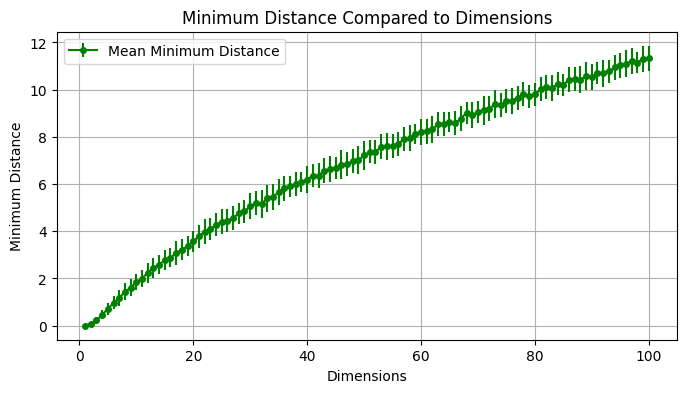

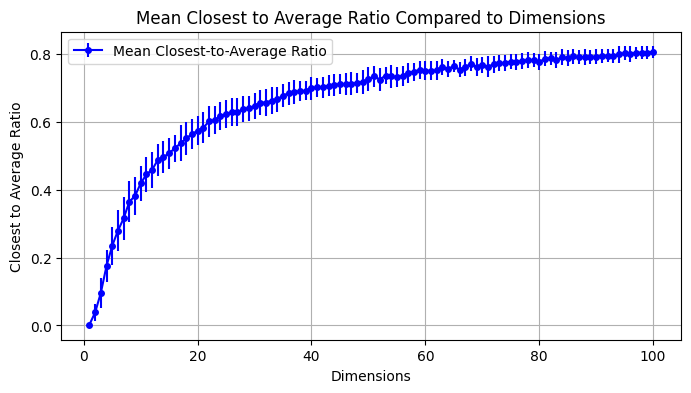

In [8]:
dimensions = range(1, 101) #for all 100 dimensions
#here, since i couln't find a line plot to properly display both the calculated values and the standart deviation, i used errorbar instead.

# plot for the average distance
plt.figure(figsize=(8, 4))
plt.errorbar(dimensions, mean_average_distance, yerr=standart_deviation_of_average_distance, fmt='-o', label='Average Distance', color='red',markersize=4)
plt.xlabel('Dimensions')
plt.ylabel('Average Distance')
plt.title('Average Distance Compared to Dimensions')
plt.grid(True)
plt.legend()
plt.show()

#plot for the minimum distance
plt.figure(figsize=(8, 4))
plt.errorbar(dimensions, mean_minimum_distance, yerr=standart_deviation_of_minimum_distance, fmt='-o', label='Mean Minimum Distance', color='green',markersize=4)
plt.xlabel('Dimensions')
plt.ylabel('Minimum Distance')
plt.title('Minimum Distance Compared to Dimensions')
plt.grid(True)
plt.legend()
plt.show()

# plot for the ratio
plt.figure(figsize=(8, 4))
plt.errorbar(dimensions, mean_ratio, yerr=standart_deviation_of_ratio, fmt='-o', label='Mean Closest-to-Average Ratio', color='blue',markersize=4)
plt.xlabel('Dimensions')
plt.ylabel('Closest to Average Ratio')
plt.title('Mean Closest to Average Ratio Compared to Dimensions')
plt.grid(True)
plt.legend()
plt.show()


c) Plot a histogram of all pairwise distances for cases where d is 2, 5, 10, and 100 dimensions.

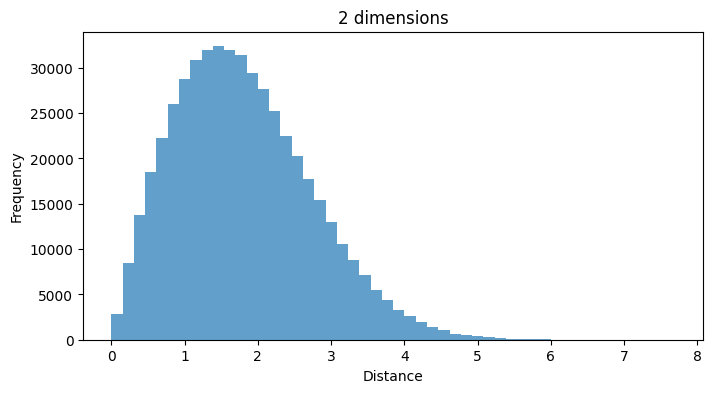

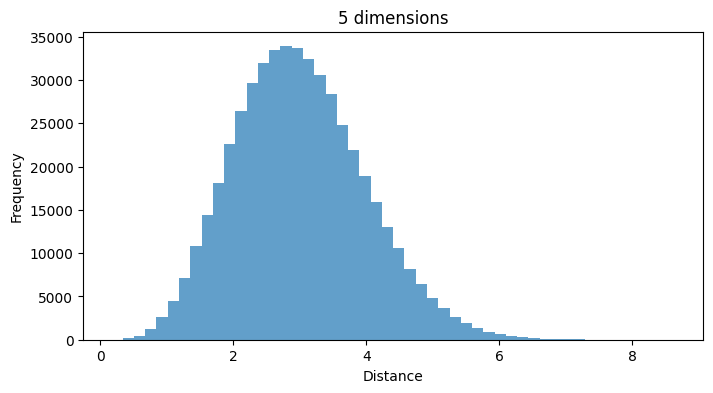

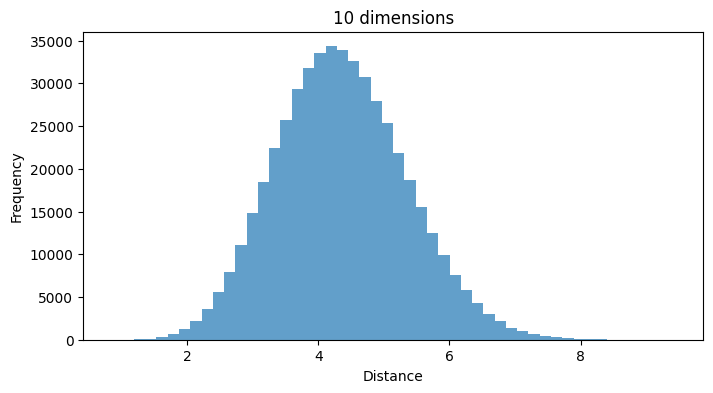

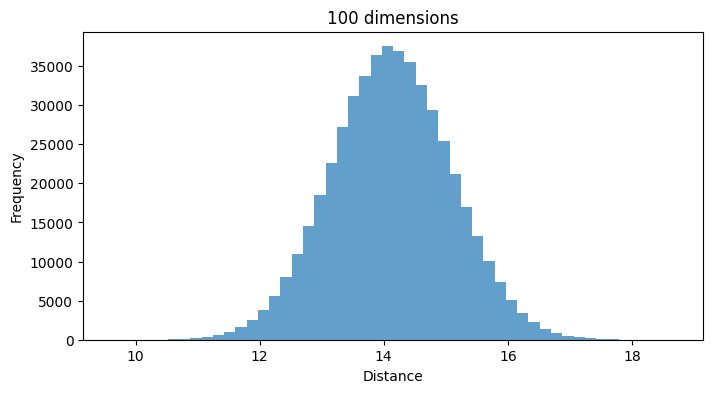

In [9]:
def pairwise_distance_calculator(points): #here i wrote another function to calculate the distances between all pairwise points
    number_of_points = points.shape[0] # this line gives the number of points in the space
    distances = np.sqrt(np.sum((points[:, np.newaxis, :] - points[np.newaxis, :, :]) ** 2, axis=2)) #this line calculates the distances
    distances = distances[np.triu_indices(number_of_points, k=1)] #this line gives the matrix of the distances
    return distances

# the dimensions to be used for the plots
selected_dimensions = [2, 5, 10, 100]

# histogram for dimension 2
plt.figure(figsize=(8, 4))
points = random_points(1000, 2)
distances = pairwise_distance_calculator(points)
plt.hist(distances, bins=50, alpha=0.7)
plt.title('2 dimensions')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# histogram for dimension 5
plt.figure(figsize=(8, 4))
points = random_points(1000, 5)
distances = pairwise_distance_calculator(points)
plt.hist(distances, bins=50, alpha=0.7)
plt.title('5 dimensions')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# histogram for dimension 10
plt.figure(figsize=(8, 4))
points = random_points(1000, 10)
distances = pairwise_distance_calculator(points)
plt.hist(distances, bins=50, alpha=0.7)
plt.title('10 dimensions')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# histogram for dimension 100
plt.figure(figsize=(8, 4))
points = random_points(1000, 100)
distances = pairwise_distance_calculator(points)
plt.hist(distances, bins=50, alpha=0.7)
plt.title('100 dimensions')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

d)Analyze, interpret, and discuss the trends observed in the plots.

<span style="color:green; font-size:12pt; font-weight:bold">For the B part:</span>

On the average distance plot, we can clearly see the average distance between the selected point to the other point increases exponentially, as the number of dimensions grow, the volume of the space also grows. From here, we can also see that hyperparameters such as K nearest neighbor works well when the data points is closer to another, and since when the dimensions grow, the data becomes sparser, the ability for us to rely on it decreases.

On the minimum distance plot, we can also see the same effect, as the minimum distance between points increase when the number of dimensions increases. This also, like the average distance, gives us the idea that machine learning models are tend to work on lower dimensions, as the data is closer to access.

For the mean closest to average ratio graph, we can see that the ratio increases to 0.8 and than stabilises for the increasing dimensions. This suggest that after a point in the number of dimensions, unlike the minimum distance or average distance, the relative difference between them does not grow as much.

<span style="color:green; font-size:12pt; font-weight:bold">For the C part:</span>

Here, we have plotted the distance between pairwise points with respect to different dimensions. The frequency shows how many of this pairs that we have for the given distances.

From the plots with dimensions 2 and 5, we can clearly understand that the distance between pairwise points are tend to be lower, between 0 and 4. They tend to be concentrated among the smaller values. This is because on smaller dimensions, as with the previous plots, there are fewer points that are distant from one another.

However as we begin to increase the dimensions, the distribution also starts to spread out significantly. By the time we reach to 100 dimensions, we can see that the peak shifts to distance of 14 and the distributions starts to act like an normal distribution.

This is indeed the effect of increasing dimensions causing sparse data points, and eventaully increasing distances.In the high - dimensional spaces, the machine learning algorithms need to adjust themselves to the sparse datasets, as the reliance to the methods using distance metrics decrease when the dimensions increase.

<span style="font-size:14pt;">Q2. k-NN Classifier In Action</span>

<span style="color:green; font-size:12pt; font-weight:bold">Q2.1 : Dataset</span>

In this question, the homework document did not have the divided parts like the first question, so for the sake of readability, i parted it.

<span style="color:red;">Step 1:</span> The Fashion-MNIST dataset is a collection of 28x28 grayscale images of 70,000 fashion products from 10
different categories, each represented by 7,000 images with each pixel value ranging from 0 to 255.
Figure 1: Samples from the Fashion MNIST
To download the Fashion-MNIST dataset, you will use the Keras1
library. The dataset comprises 60,000
training samples and 10,000 test samples. You will split the training data into two sets: a development set
for training your models and a validation set for testing the performance of your models during development.

In [10]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() #lets load the data

In [11]:
print('X_train shape:', X_train.shape, ', y_train shape:', y_train.shape) #lets see the numbers that we have at hand
print('X_test shape: ', X_test.shape, ', y_test shape: ', y_test.shape)

X_train shape: (60000, 28, 28) , y_train shape: (60000,)
X_test shape:  (10000, 28, 28) , y_test shape:  (10000,)


Now from the original 60k training data, we will split %20 for validation and %80 for actual training. Which means after the split,
we will have 12k images for validation and 48k for the training.

Now the split and shuffle operation, recalling from what we have seen from the recitation, i am using the train_test_split function from sklearn.

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True) #we shuffle and split the data

print('Training set:', X_train.shape, y_train.shape) #the training set
print('Validation set:', X_val.shape, y_val.shape) #the validation set
print('Test set:', X_test.shape, y_test.shape) #the test set which we haven't touched yet.

Training set: (48000, 28, 28) (48000,)
Validation set: (12000, 28, 28) (12000,)
Test set: (10000, 28, 28) (10000,)


<span style="color:green; font-size:12pt;font-weight:bold">Q2.2 : Find the Best K</span>

<span style="color:red;">Step 1:</span> The Fashion-MNIST images provided by Keras are in a 3D array
format (samples, 28, 28), representing the number of samples and the dimensions of each image. However,
the k-NN classifier implemented in the Scikit-learn library requires input data in a 2D array format (samples,
features). Therefore, before training your k-NN model, you must reshape the dataset from 3D arrays into
2D arrays. This process, often referred to as ‘flattening ’, converts each 28x28 image into a 784-dimensional
vector.

In [13]:
#let's first format the array format from 3d to 2d. I did this part just like how we did it in the recitation.

print('X_train shape before: ', X_train.shape) #i printed how they looked like before
print('X_val shape before: ', X_val.shape)

X_train = X_train.reshape(X_train.shape[0], -1) # now we reshape all sets
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

print('X_train shape after: ', X_train.shape)  #now the end result, recall how it came to 784 from 28 x 28
print('X_val shape after: ', X_val.shape)


X_train shape before:  (48000, 28, 28)
X_val shape before:  (12000, 28, 28)
X_train shape after:  (48000, 784)
X_val shape after:  (12000, 784)


<span style="color:red;">Step 2:</span> Your task is to build k-NN classifier using the Scikit-learn library. You will train the k-NN
classifier using the training set and tune the hyperparameters to optimize its performance on the validation
set. Specifically, you will determine the optimal number of nearest neighbors (referred to as n neighbors in
the documentation) to use.

To find the optimal value of k neighbors, you should experiment with the following values: [1, 3, 7, 12,
20, 30, 50, 75, 100]. For each value, evaluate the performance of the classifier on the validation set.
Print out the optimal value of k. 

In [14]:
#again here i slightly modified the code from the recitation, so that it did the same thing for all the k values in a loop.

k_values = [1, 3, 7, 12, 20, 30, 50, 75, 100] #k values
accuracies = [] #accuracies for each k

for k in k_values: #this part trains and checks the values
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) #we first fit the training data
    
    y_pred_val = knn.predict(X_val) #than validate it with our validation data
    
    accuracy = accuracy_score(y_val, y_pred_val) #check the accuracy with the labels
    accuracies.append(accuracy) #append the respected accuracy to array
    
    print(f'Accuracy for k={k}: {accuracy}')

optimal_k = k_values[accuracies.index(max(accuracies))] #select the opitmal k value
print(f'Optimal value of k: {optimal_k}')


Accuracy for k=1: 0.8499166666666667
Accuracy for k=3: 0.8554166666666667
Accuracy for k=7: 0.855
Accuracy for k=12: 0.8520833333333333
Accuracy for k=20: 0.8449166666666666
Accuracy for k=30: 0.83825
Accuracy for k=50: 0.8315
Accuracy for k=75: 0.8231666666666667
Accuracy for k=100: 0.8161666666666667
Optimal value of k: 3


 Plot the validation accuracy for the different values of k neighbors, creating
a graph where the x-axis represents the values of k neighbors, and the y-axis represents the corresponding
validation accuracy. This visualization will aid in selecting the most suitable value for k neighbors. Utilize
the matplotlib library to generate the plot.

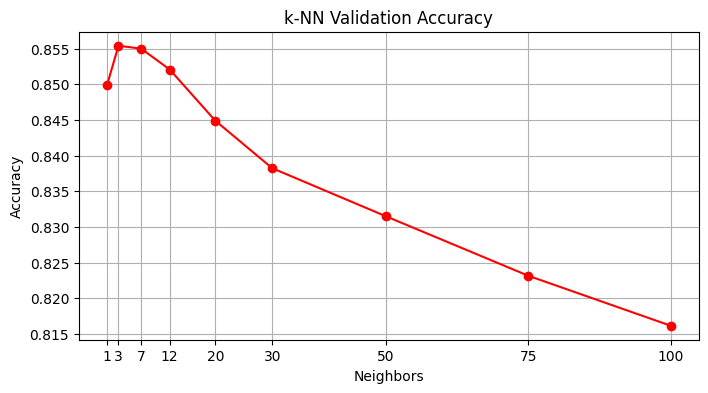

In [15]:
# plotting the results
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o',color='red')
plt.title('k-NN Validation Accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

From here, also, we can see that k = 3 is the best neighbor.

<span style="color:red;">Step 3:</span> Now that you have determined the optimal value of k neighbors, you should retrain the k-NN classifier
by combining the training and validation sets. Then, assess its performance on the test set, and print out
the test accuracy. This will provide an estimate of the test accuracy and how well your classifier is expected
to perform on new, unseen data.

In [16]:
X_train = np.concatenate((X_train, X_val), axis=0) #just like how we did in the recitation, i combined x-y train with x-y validation
y_train = np.concatenate((y_train, y_val), axis=0)

print('X_train shape now: ', X_train.shape)
print('X_val shape now: ', X_val.shape)

print('y_train shape now: ', y_train.shape)
print('y_val shape now: ', y_val.shape)



X_train shape now:  (60000, 784)
X_val shape now:  (12000, 784)
y_train shape now:  (60000,)
y_val shape now:  (12000,)


In [20]:
knn = KNeighborsClassifier(n_neighbors=optimal_k) #this time, just like step 2, i again trained the knn with our combined dataset,
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test) #but this time, rather than x validation, we did the test with the actual X test

test_acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Test accuracy of KNN with k={}: {:.3f}'.format(optimal_k, test_acc))

Test accuracy of KNN with k=3: 0.854


<span style="color:red;">Step 4:</span> Finally, plot the confusion matrix for the final model’s predictions across the ten classes. Discuss any
patterns or insights you can draw from this visualization. For example, which classes have the highest number
of misclassifications? Are there specific pairs of classes that are commonly mistaken for one another?

In [21]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred) #just used the recitation code here, i will use the graphical one for comments below
print(conf_matrix)

[[853   1  16  15   3   0 106   1   5   0]
 [  9 971   2  11   4   0   2   0   1   0]
 [ 27   2 812   8  78   0  73   0   0   0]
 [ 48   7  22 855  30   0  36   0   2   0]
 [  5   3 141  24 743   0  82   0   2   0]
 [  1   0   0   1   0 835   3  90   0  70]
 [177   3 132  21  63   0 595   0   9   0]
 [  0   0   0   0   0   3   0 952   0  45]
 [  7   1  10   3   3   1  16   6 952   1]
 [  0   0   0   0   0   2   0  24   1 973]]


<Figure size 800x800 with 0 Axes>

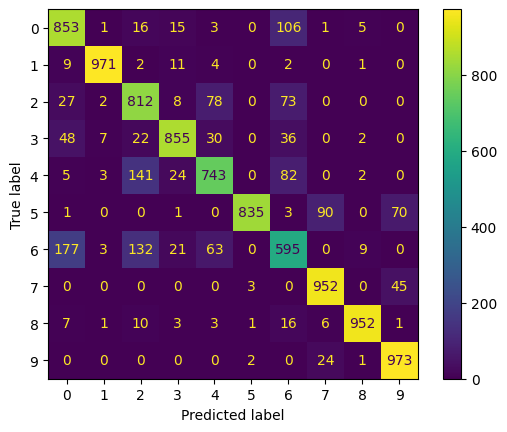

In [22]:
plt.figure(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred,
                                        colorbar=True,)
plt.show()

Since the diagonal lines on the confusion matrix show the correctness of the the predictions and the off - diagonal lines show the errors in the predictions, we can clearly say that the labels with the highest numbers on the diagonals(such as label  0 and 1) may indicate that thay have often correctly classified. (we must be careful however as it does not mean the same rate)

For example from the matrix, we can see that the algorithm often misclassified the label 6 with label 0 (with 177 errors) and label 2 (with 132 errors). This means, the machine learning model had some problems with labels 6, 2 and 0. Also, the label 4 also had some problems with the labels 2 and 6.

This also means, for the specific pairs part, the model has had errors with label pairs (6,2), (6,0) and (4,2).

If we knew the real names of the labels here from the datasets, we could say something like, the ml model mainly confuses when selecting between t-shirts and sweatshirts. But here, since i don't know the names, we can only say the problematic label numbers. This is the result of some clothes being very similar to others, as our model is uncapable of finding which one is which. Further improving the classier or using different hyperparameters to tune may help with the results.



This is the end of the homework 1 notebook.